<a href="https://colab.research.google.com/github/GKS07/Classification_Projects/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Approval Prediction** means using credit history data of the loan applicants and algorithms to build an intelligent system that can detrmine loan approvals.

Loan approval prediction is one of the problem that **Machine Learning** has solved in banks and financial institutions.

**Using Kaggle API to download the data.**

In [1]:
# Mounting the google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# installing the kaggle APi
! pip install -q kaggle

In [3]:
# uploading the kaggle jason file.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gau7rav","key":"50c43821a9373319816f6b8412be5c26"}'}

In [4]:
#making the Kaggle Directopry and copying the kaggle jason file.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
# Downloading the Loan Approval Dataset.
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

loan-prediction-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# making the directory
! mkdir Loan_approval_dataset

mkdir: cannot create directory ‘Loan_approval_dataset’: File exists


In [7]:
# unzipping the file.
! unzip loan-prediction-problem-dataset.zip -d Loan_approval_dataset
y

Archive:  loan-prediction-problem-dataset.zip
replace Loan_approval_dataset/test_Y3wMUE5_7gLdaTN.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
#importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#exploring the datasets.
loan_data = pd.read_csv("/content/Loan_approval_dataset/train_u6lujuX_CVtuZ9i.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_data.shape

(614, 13)

In [11]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#droping the loan amount coloumn
loan_data = loan_data.drop('Loan_ID', axis = 1)

In [13]:
#Looking for the missing values
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
# we have less data so i'll not drop any data, rather i'll fill the categorical data with mode(it will fill the most frequent data.) and numerical data with median.

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace = True)


In [16]:
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace = True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace = True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace = True)

In [17]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace = True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace = True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace = True)

In [18]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h2>Exploratory Data Analysis</h2>

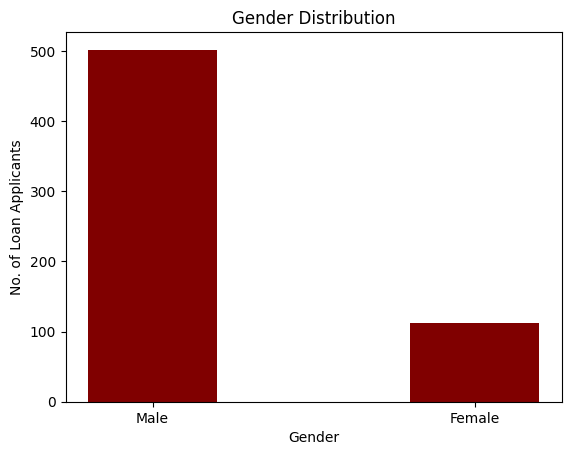

In [19]:
# Gender distribution

gender = loan_data['Gender'].value_counts()
plt.bar(gender.index, gender.values, color = 'maroon', width = 0.4 )
plt.xlabel("Gender")
plt.ylabel("No. of Loan Applicants")
plt.title("Gender Distribution")
plt.show()

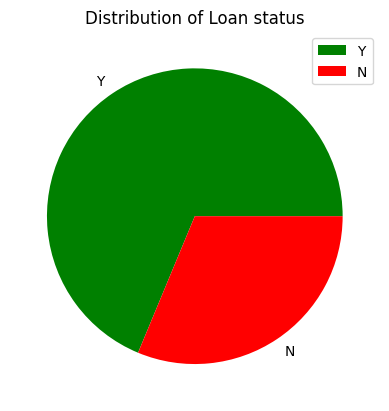

In [20]:
#distribution of loan status

loan_status = loan_data['Loan_Status'].value_counts()

plt.pie(loan_status.values, labels = loan_status.index, colors = ['Green', 'Red'])
plt.legend()
plt.title("Distribution of Loan status")
plt.show()

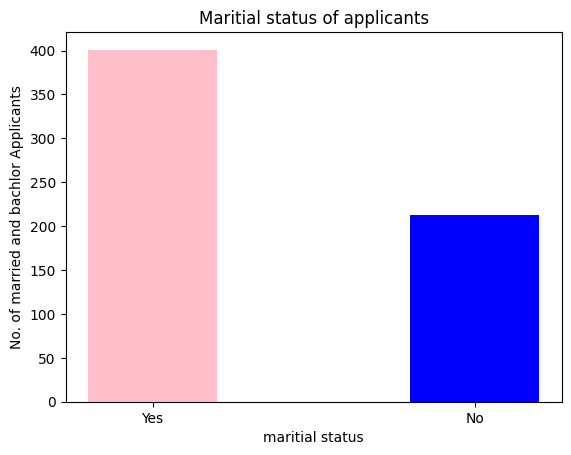

In [21]:
#maritial status

marry = loan_data['Married'].value_counts()
plt.bar(marry.index, marry.values, color = ['Pink', 'blue'], width = 0.4 )
plt.xlabel("maritial status")
plt.ylabel("No. of married and bachlor Applicants")
plt.title("Maritial status of applicants")
plt.show()

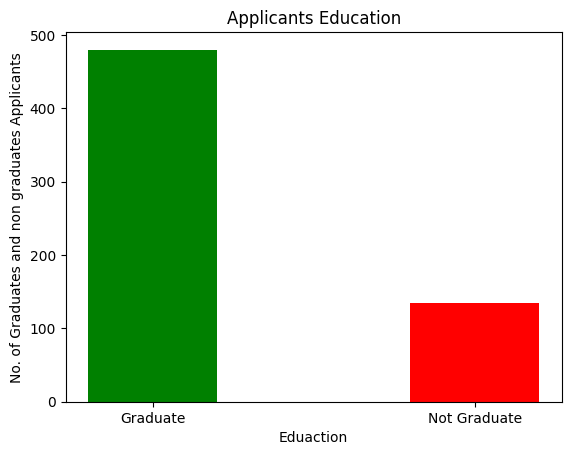

In [22]:
# applicants education

edu = loan_data['Education'].value_counts()
plt.bar(edu.index, edu.values, color = ['green', 'red'], width = 0.4 )
plt.xlabel("Eduaction")
plt.ylabel("No. of Graduates and non graduates Applicants")
plt.title("Applicants Education")
plt.show()

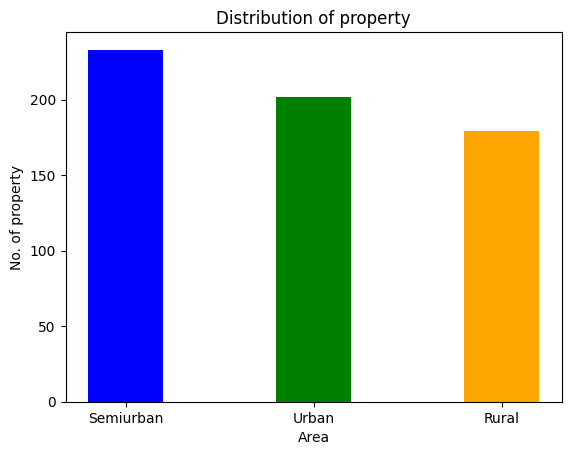

In [23]:
# property area of applicants
property = loan_data['Property_Area'].value_counts()
plt.bar(property.index, property.values, color = ['blue', 'green', 'orange'], width = 0.4 )
plt.xlabel("Area")
plt.ylabel("No. of property")
plt.title("Distribution of property")
plt.show()

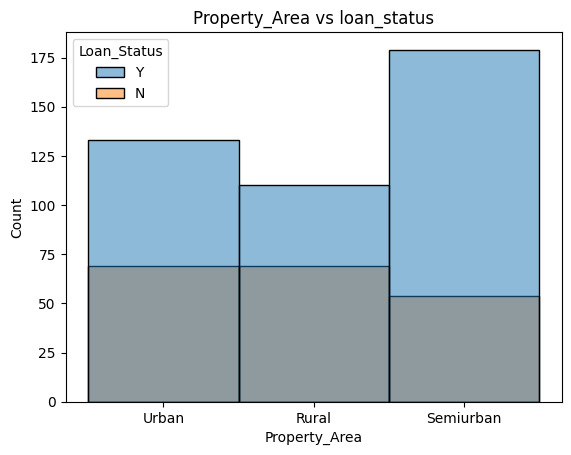

In [24]:
sns.histplot(data = loan_data, x = 'Property_Area', hue = 'Loan_Status')
plt.title("Property_Area vs loan_status")
plt.show()

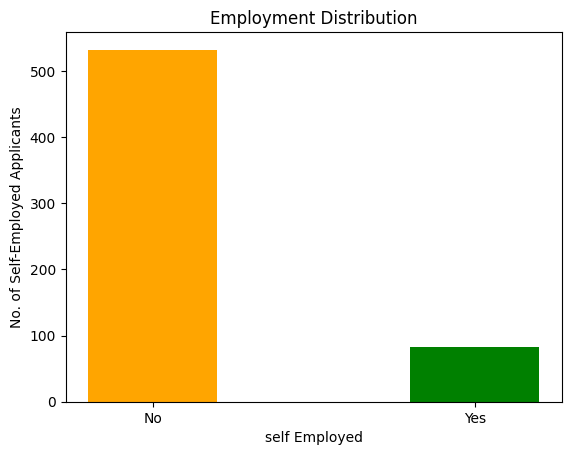

In [25]:
#Employment status

employed = loan_data['Self_Employed'].value_counts()
plt.bar(employed.index, employed.values, color = ['orange', 'green'], width = 0.4 )
plt.xlabel("self Employed")
plt.ylabel("No. of Self-Employed Applicants")
plt.title("Employment Distribution")
plt.show()

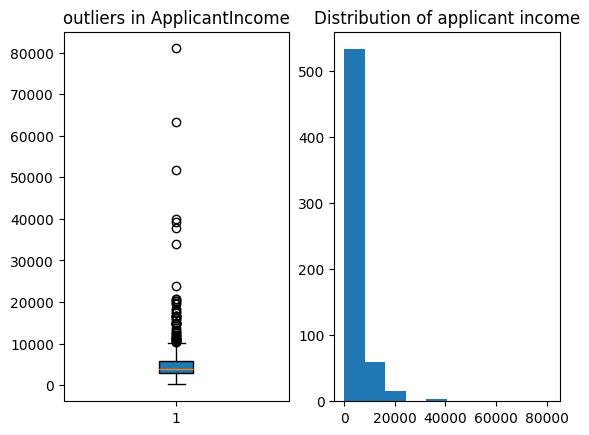

In [26]:
# Distribution of Applicants Income.

figure, axis = plt.subplots(1,2)

axis[0].boxplot(loan_data['ApplicantIncome'], patch_artist = True)
axis[0].set_title("outliers in ApplicantIncome")

axis[1].hist(loan_data['ApplicantIncome'])
axis[1].set_title("Distribution of applicant income")

plt.show()

The Applicants income has Outliers. before i move further to Machine learning part i have to remove the outliers.

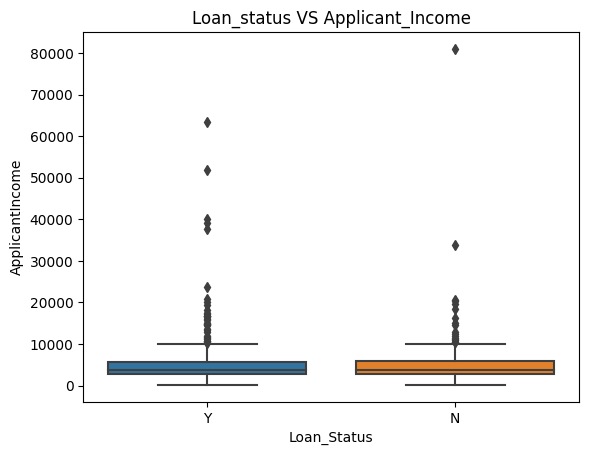

In [27]:
#Status of the loan with respect to applicants income.

#import seaborn as sns

sns.boxplot(data = loan_data, x = 'Loan_Status', y = "ApplicantIncome")
plt.title("Loan_status VS Applicant_Income")
plt.show()


In [28]:
# Removing the outliers from Applicant Income.
# defining the IQR

Q1 = loan_data['ApplicantIncome'].quantile(0.25)
Q3 = loan_data['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

# defining the lower and upper bound for the outliers

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Removing the outliers

loan_data = loan_data[(loan_data['ApplicantIncome'] >= LB) & (loan_data['ApplicantIncome'] <= UB)]


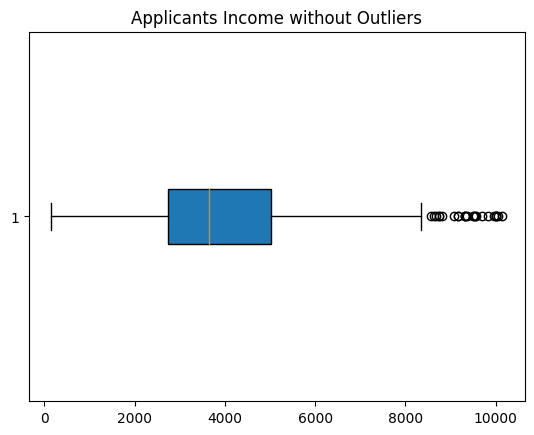

In [29]:
plt.boxplot(loan_data['ApplicantIncome'], patch_artist = True, vert = 0)
plt.title("Applicants Income without Outliers")
plt.show()

<Figure size 1000x1000 with 0 Axes>

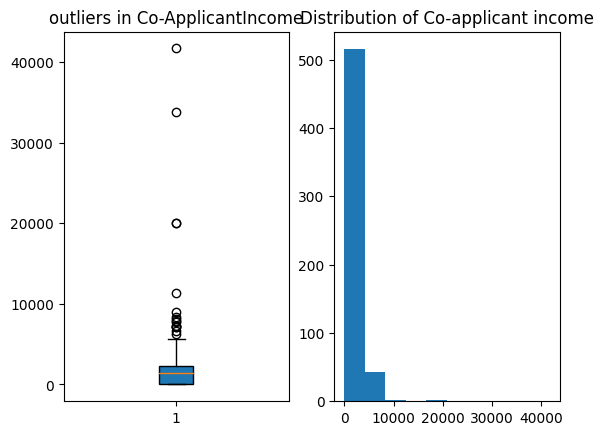

In [30]:
# Distribution of Co-Applicants Income.
fig = plt.figure(figsize = (10,10))
figure, axis = plt.subplots(1,2)

axis[0].boxplot(loan_data['CoapplicantIncome'], patch_artist = True)
axis[0].set_title("outliers in Co-ApplicantIncome")

axis[1].hist(loan_data['CoapplicantIncome'])
axis[1].set_title("Distribution of Co-applicant income")

plt.show()

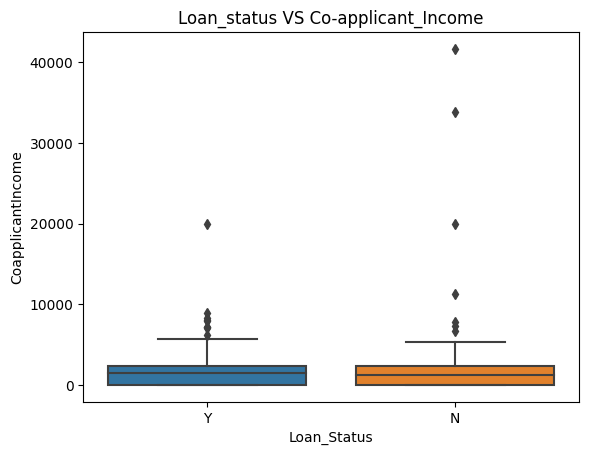

In [31]:
#Status of the loan with respect to co-applicants income.

sns.boxplot(data = loan_data, x = 'Loan_Status', y = "CoapplicantIncome")
plt.title("Loan_status VS Co-applicant_Income")
plt.show()


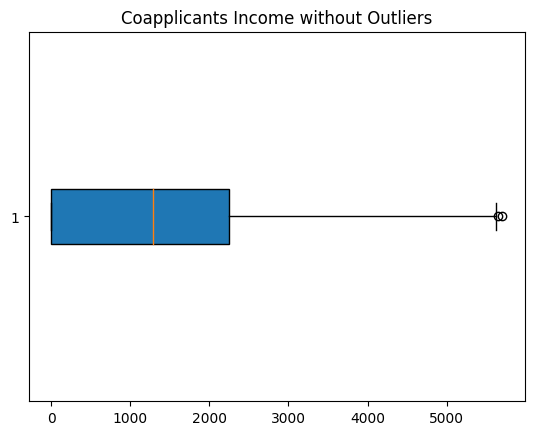

In [32]:
# Removing the outliers from coapplicant Income.
# defining the IQR

Q1 = loan_data['CoapplicantIncome'].quantile(0.25)
Q3 = loan_data['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

# defining the lower and upper bound for the outliers

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Removing the outliers

loan_data = loan_data[(loan_data['CoapplicantIncome'] >= LB) & (loan_data['CoapplicantIncome'] <= UB)]


plt.boxplot(loan_data['CoapplicantIncome'], patch_artist = True, vert = 0)
plt.title("Coapplicants Income without Outliers")
plt.show()



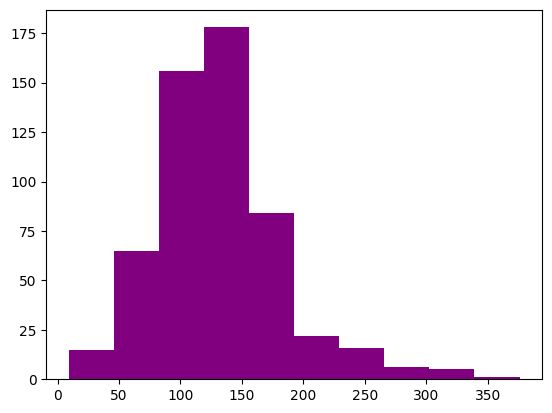

In [33]:
# distribution of the loan amount

plt.hist(loan_data['LoanAmount'], color = 'purple')
plt.show()

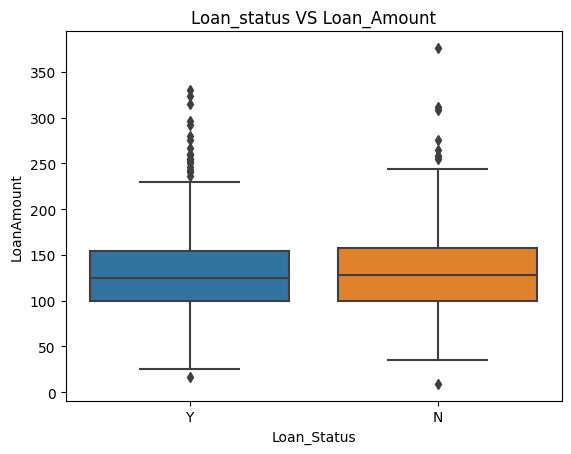

In [34]:
# Loan status with respect to  loan amount.
sns.boxplot(data = loan_data, x = 'Loan_Status', y = "LoanAmount")
plt.title("Loan_status VS Loan_Amount")
plt.show()

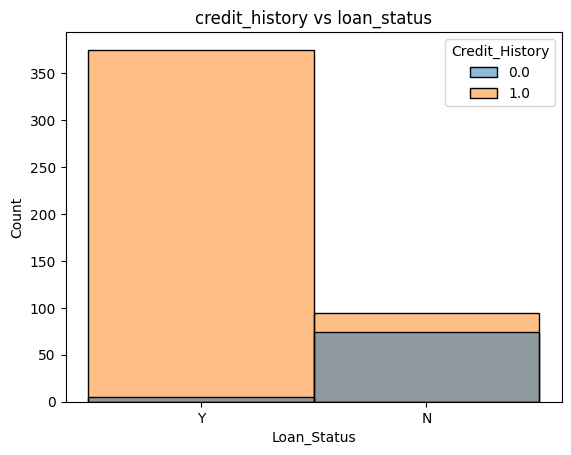

In [35]:
#Impact of credit hostory on loan status

sns.histplot(data = loan_data, x = 'Loan_Status', hue = 'Credit_History')
plt.title("credit_history vs loan_status")
plt.show()

<h2>Data Preperation </h2>

In [36]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
#converting the categorical data

col = ['Gender','Married','Education','Self_Employed','Property_Area', 'Dependents']
loan_data = pd.get_dummies(loan_data, columns = col)

In [38]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [39]:
#importing the Libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [40]:
#splitting the data into dependent and independent data.

Dep_var = loan_data.drop('Loan_Status', axis = 1)

# converting the 'Y' to 1 and 'N' to 0:

ind_var = loan_data['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace = True )


In [41]:
y = loan_data['Loan_Status']

In [42]:
loan_data['Gender_Male'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender_Male, dtype: uint8

In [43]:
#splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(Dep_var, y , test_size = 0.2, random_state = 42)

In [45]:
#scaling the numerical data

scaler = StandardScaler()

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

<h2>Defining the Model</h2>

In [57]:
from sklearn.svm import SVC

model = SVC(random_state = 44)
model.fit(x_train, y_train)

SVC(random_state=44)

In [58]:
y_pred = model.predict(x_test)

In [59]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 18],
       [ 1, 74]])

In [60]:
Acc = accuracy_score(y_test, y_pred)
print("The Accuracy of this model is:\t", Acc)

The Accuracy of this model is:	 0.8272727272727273
